## Proteus-1 well-logs

### VSP Collection 

Well-log data that accompanied the 

COP_Pharos-1_logs_time.las - Well log in TWT (Can directly compare to seismic)

COP_Pharos-1_synthetics.las -  Well log synthetics

These are synthetic seismic forward modeled from the well-logs

COP_Pharos-1_logs_depth.las - Well log depth


To load the las files we use lasio, if you need to install it, run:

!pip install lasio

from a jupyter notebook.

In [1]:
from os import path
import matplotlib.pylab as plt
import numpy as np
import lasio

In [30]:
DATAPATH = path.expanduser("/Volumes/Backup/Poseidon")

In [31]:
# this data has a COP_Proteus-1ST2_CH_QSLT_PnS_Processed_PTS.PDF associated with it
_time_logs = lasio.read(path.join(DATAPATH, "Pharos-1_VSP/COP_Pharos-1_logs_time.las"))
_depth_logs = lasio.read(path.join(DATAPATH, "Pharos-1_VSP/COP_Pharos-1_logs_depth.las"))
_synthetics = lasio.read(path.join(DATAPATH, "Pharos-1_VSP/COP_Pharos-1_logs_time.las"))

We well-logs already converted to time are useful because we don't have to handle 
a depth-time mapping. We can directly compare this to the seismic.

In [32]:
# These are useful because our seis
time_logs = _time_logs.df()
depth_logs = _depth_logs.df()
synthetics = _synthetics.df()

In [33]:
print (time_logs.columns)

Index(['AIMP', 'AT90', 'ATTE', 'CALI:1', 'CALI:2', 'DTCO', 'GR:1', 'GR:2',
       'MULT', 'MUON', 'PWXO', 'PRIM', 'REFL', 'RHOB', 'SVEL'],
      dtype='object')


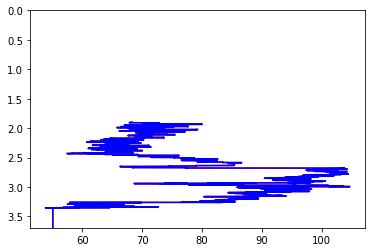

In [51]:
plt.plot(time_logs['DTCO'], time_logs.index, '-r')
plt.plot(time_logs['DTCO'][time_logs.index > 1.9], time_logs.index[time_logs.index > 1.9], '-b')
plt.ylim([time_logs.index.max(), time_logs.index.min()])
plt.show()

# looks wierid
time_logs['DTCO'][time_logs.index <= 1.9] = np.nan

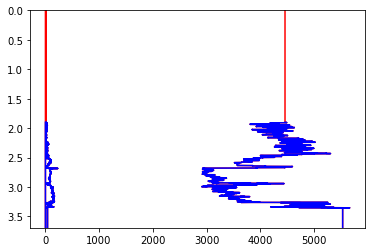

In [52]:

plt.plot(time_logs['RHOB'], time_logs.index, '-r')
plt.plot(time_logs['SVEL'], time_logs.index, '-r')
plt.plot(time_logs['GR:1'], time_logs.index, '-r')
plt.plot(time_logs['GR:2'], time_logs.index, '-r')

time_logs[time_logs.index <= 1.9] = np.nan

plt.plot(time_logs['RHOB'], time_logs.index, '-b')
plt.plot(time_logs['SVEL'], time_logs.index, '-b')
plt.plot(time_logs['GR:1'], time_logs.index, '-b')
plt.plot(time_logs['GR:2'], time_logs.index, '-b')

plt.ylim([time_logs.index.max(), time_logs.index.min()])

plt.show()


In case there are nan's pandas has some simple tools to fill them

In [47]:
time_logs.fillna(method='bfill', inplace=True)
time_logs.fillna(method='ffill', inplace=True)

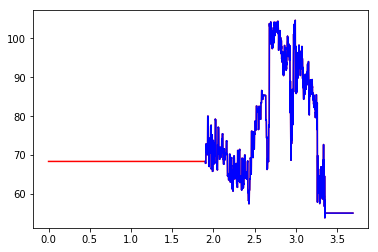

In [48]:
plt.plot(time_logs['DTCO'], '-r')
plt.plot(time_logs['DTCO'][time_logs.index > 1.9], '-b')
plt.show()


### Sonic Scanner

Raw sonic data, it's in time.

COP_Pharos-1_SonicScanner_L0_PnS_SLB.las

COP_Pharos-1_SonicScanner_L0_Aniso_SLB.las



In [39]:
# this data has a COP_Proteus-1ST2_CH_QSLT_PnS_Processed_PTS.PDF associated with it
_PnS_logs = lasio.read(path.join(DATAPATH, "COP_Pharos-1_SonicScanner/COP_Pharos-1_SonicScanner_L0_PnS_SLB.las"))
_Aniso_logs = lasio.read(path.join(DATAPATH, "COP_Pharos-1_SonicScanner/COP_Pharos-1_SonicScanner_L0_Aniso_SLB.las"))


Header section Parameter regexp=~P was not found.


In [41]:
PnS_logs = _PnS_logs.df()
Aniso_logs = _Aniso_logs.df()

In [44]:
print ("PnS_logs curves:", PnS_logs.columns)
print ("Aniso_logs curves:", Aniso_logs.columns)

PnS_logs curves: Index(['DTCO', 'DTSM_FAST', 'DTSM_SLOW', 'GR_EDTC', 'PR', 'VPVS'], dtype='object')
Aniso_logs curves: Index(['BS', 'DTSM_FAST', 'DTSM_SLOW', 'FSH_P1NO', 'GR_EDTC', 'HAZIM',
       'HD1_PPC1', 'HD2_PPC1', 'MAXXENE_OVERALL', 'MINXENE_OVERALL', 'P1NO',
       'SDEV', 'SLOANI', 'TIMANI'],
      dtype='object')


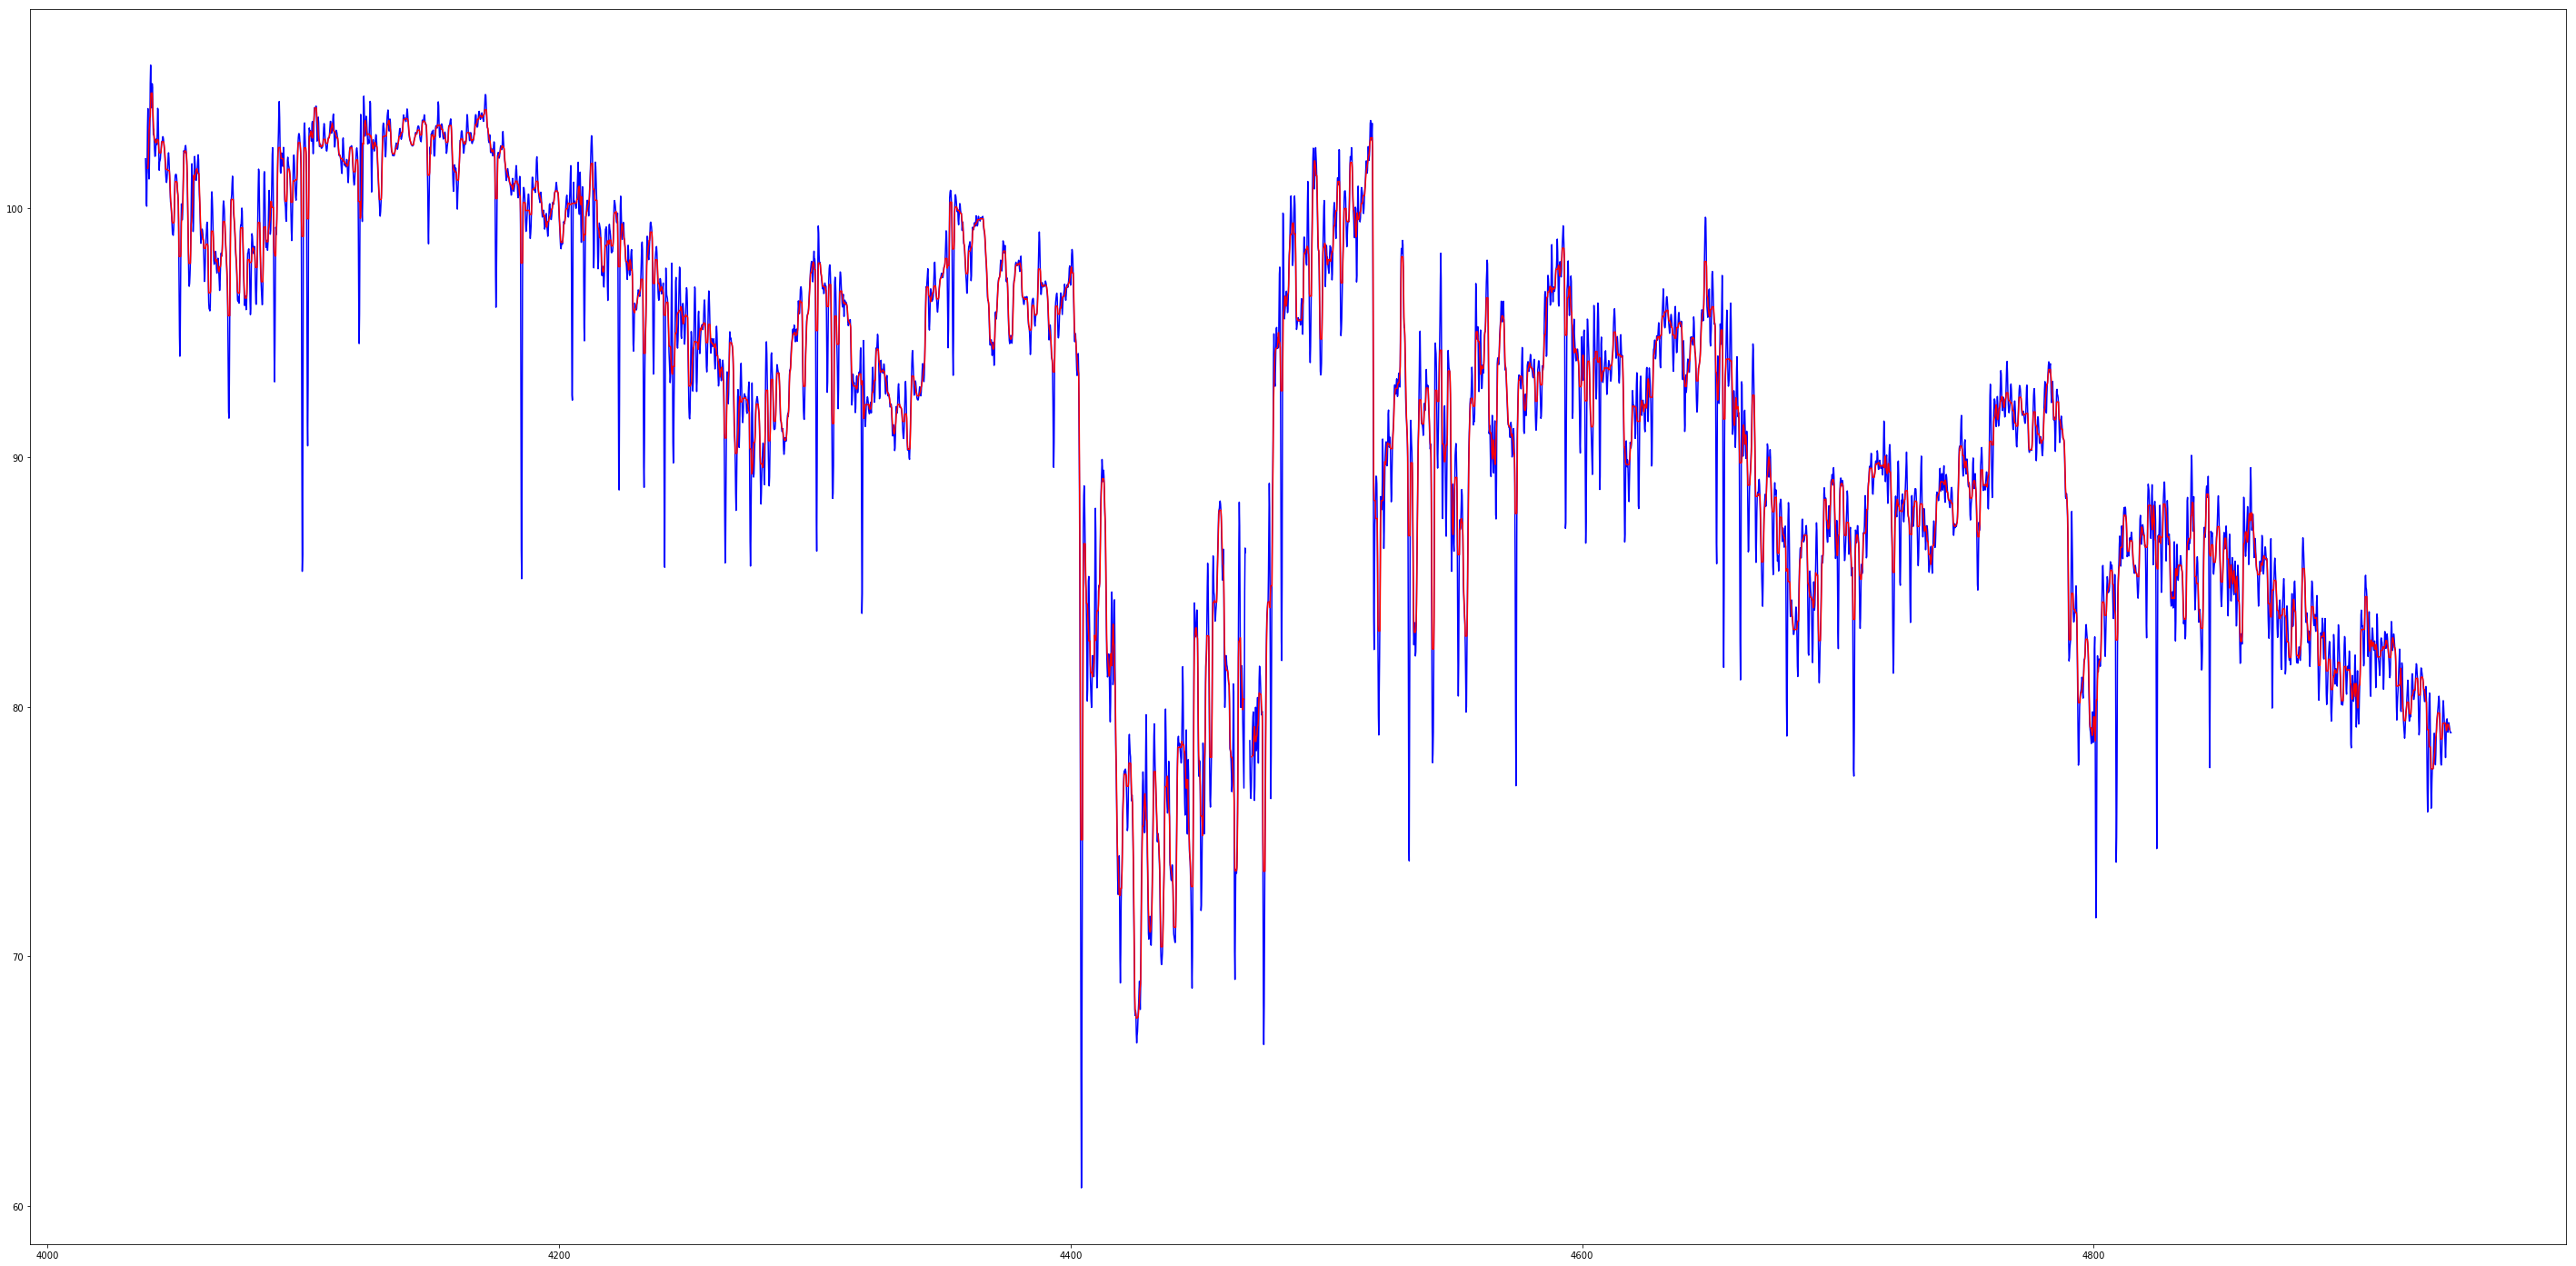

In [46]:
# data looks weird
plt.figure(figsize=(50,25))
plt.plot(PnS_logs['DTCO'] ,'-b')
plt.plot(PnS_logs['DTCO'].rolling(window=10, center=True).median(),'-r')
plt.show()

In [ ]:
dm = data['GR_STGC'] - data['GR_STGC'].rolling(window=50, center=True).median()
